# GAUSSIAN NOISE
### Normal equations

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:

def vandermore(X, K):
    N=X.shape[0]
    phi=np.zeros((N,K))
    for j in range(K):
        phi[:,j]=X**j
    return phi

create dataset X_test

Text(0.5, 1.0, 'Datapoints')

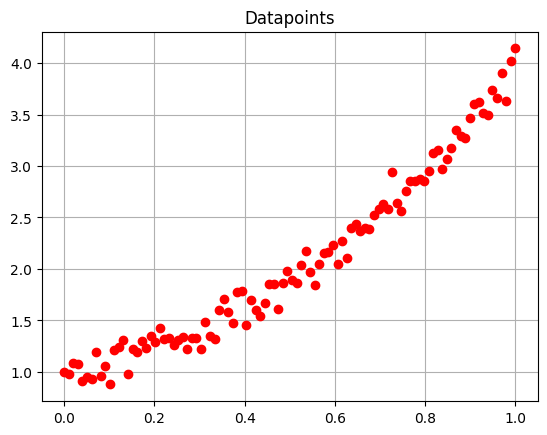

In [3]:
N=100 
K=4

a=0
b=1
theta_true=np.ones((K,))
X=np.linspace(a,b,N)
phi=vandermore(X, K)
Y = phi @ theta_true 

sigma=0.1
Y=Y+sigma*np.random.normal(0,1,Y.shape)

plt.plot(X,Y, "o", color="red")
plt.grid()
plt.title("Datapoints")


# MLE
<hr>

(100, 4)


Text(0.5, 1.0, 'MLE fit')

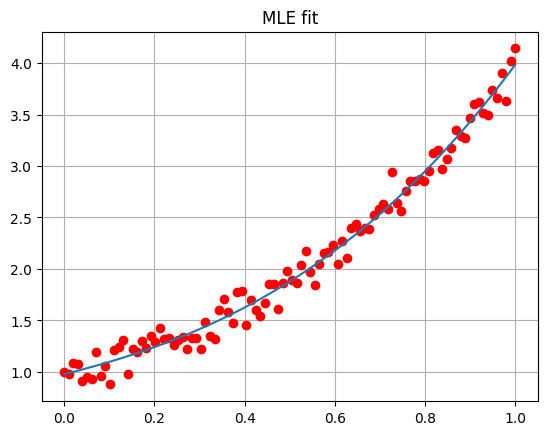

In [4]:
theta_mle= np.linalg.solve(phi.T@phi, phi.T@Y) 
XX=np.linspace(a,b,1000)
YY=vandermore(XX,K)@theta_mle
plt.plot(X,Y, "ro")
print(phi.shape)

plt.plot(XX,YY)
plt.grid()
plt.title("MLE fit")

In [5]:
def test_Error(theta, phi, Y):
    result=np.linalg.norm(phi@theta-Y,2)**2
    N=Y.shape[0]
    return result/N

In [6]:
def fit_mle(D,K):
    X,Y=D
    phi=vandermore(X,K)
    theta_mle= np.linalg.solve(phi.T@phi, phi.T@Y)
    return theta_mle

## different values of K

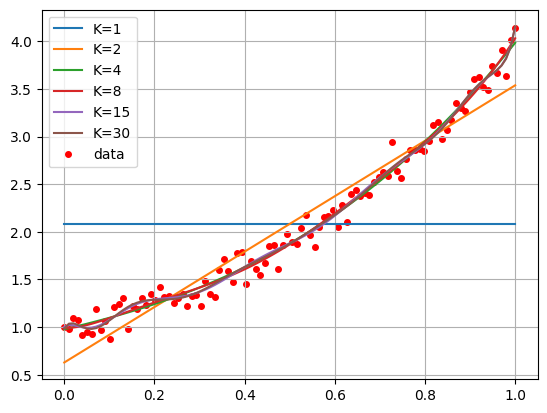

In [7]:
k_values=[1,2,4,8,15,30]
for K_trial in k_values:
    phi_trial=vandermore(X, K_trial)
    theta_mle_t=np.linalg.solve(phi_trial.T@phi_trial, phi_trial.T@Y)
    plt.plot(X, phi_trial@theta_mle_t, label="K="+str(K_trial), zorder=2)

plt.plot(X,Y, "ro", markersize=4, label="data", zorder=1)
plt.legend()
plt.grid()

## Test and train error 
for different values of K

Text(0, 0.5, 'error')

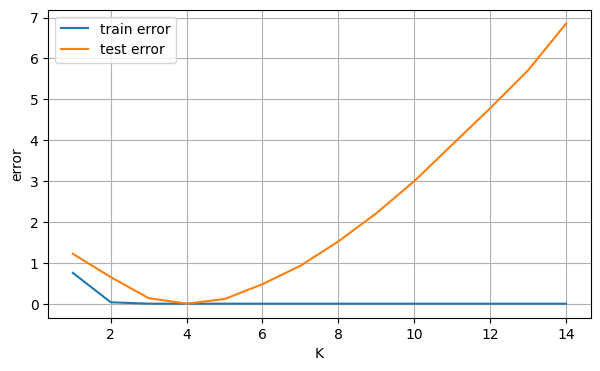

In [8]:
N_test=50
X_test=np.linspace(a,b,N_test)
k_values=np.arange(1,15)
test_error_mle=[]
train_error_mle=[]
for K_trial in k_values:
    theta_true=np.ones((K_trial,))
    Y_test=vandermore(X_test,K_trial)@theta_true
    Y_test=Y_test+sigma*np.random.normal(0,1,Y_test.shape)
    theta_train=fit_mle((X,Y), K_trial)
    phi_test=vandermore(X_test, K_trial)
    phi_train=vandermore(X, K_trial)
    test_error_mle.append(test_Error(theta_train, phi_test, Y_test))
    train_error_mle.append(test_Error(theta_train, phi_train, Y))

plt.figure(figsize=(7,4))
plt.plot(k_values, train_error_mle, label="train error")
plt.plot(k_values, test_error_mle, label="test error")
plt.legend()
plt.grid()
plt.xlabel("K")
plt.ylabel("error")

# <b>MAP </b>
<hr>


Text(0.5, 0.98, 'MAP for different K and lambda')

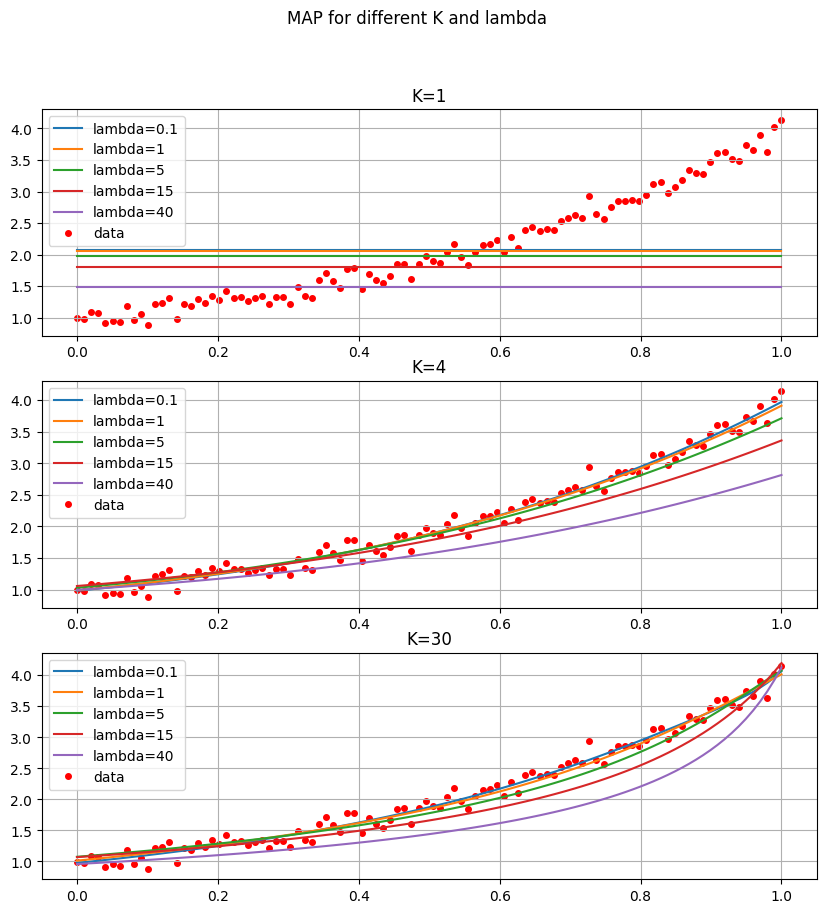

In [9]:
def fit_map(D, K, l):
    X,Y=D
    phi=vandermore(X,K)
    theta_map=np.linalg.solve(phi.T@phi+l*np.identity(K),phi.T@Y)
    return theta_map

l_val=[0.1,1,5,15,40]
k_val=[1,4,30]
plt.figure(figsize=(10,10))
i=0
for K_trial in k_val:
    i+=1
    for l_trial in l_val:
        phi_trial=vandermore(X, K_trial)
        theta_map=fit_map((X,Y), K_trial, l_trial)
        plt.subplot(3,1, i)
        plt.plot(X, phi_trial@theta_map, label="lambda="+str(l_trial))
    plt.plot(X,Y, "ro", markersize=4, label="data", zorder=1)
    plt.grid()
    plt.legend()
    plt.title("K="+str(K_trial))
plt.suptitle("MAP for different K and lambda")


## Test Error
With different values of K and fixed $\lambda$

Text(0, 0.5, 'error')

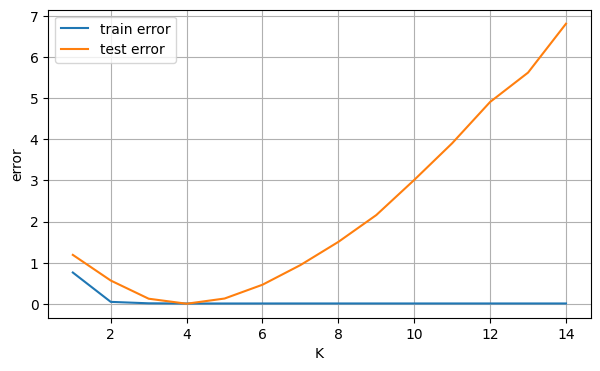

In [10]:
N_test=50
X_test=np.linspace(a,b,N_test)
k_values=np.arange(1,15)
test_error_map=[]
train_error_map=[]
lam=1
for K_trial in k_values:
    theta_true=np.ones((K_trial,))
    Y_test=vandermore(X_test,K_trial)@theta_true
    Y_test=Y_test+sigma*np.random.normal(0,1,Y_test.shape)
    theta_train=fit_map((X,Y), K_trial, lam)
    phi_test=vandermore(X_test, K_trial)
    phi_train=vandermore(X, K_trial)
    test_error_map.append(test_Error(theta_train, phi_test, Y_test))
    train_error_map.append(test_Error(theta_train, phi_train, Y))

plt.figure(figsize=(7,4))
plt.plot(k_values, train_error_map, label="train error")
plt.plot(k_values, test_error_map, label="test error")
plt.legend()
plt.grid()
plt.xlabel("K")
plt.ylabel("error")


For K being <b>way greater</b> than the correct degree of the polynomial (>>4), compute the MLE and MAP<br>
solution. Compare the <b>test error</b> of the two, for different values of λ (in the case of MAP).

MLE error:  0.00922907411323292
MAP error: 
    lambda= 0.1 -> 0.01129881492570508
    lambda= 1 -> 0.01270178895120088
    lambda= 5 -> 0.02416842578277986
    lambda= 15 -> 0.06545666242793637
    lambda= 40 -> 0.21999898835421192


Text(0.5, 0.98, 'K=500')

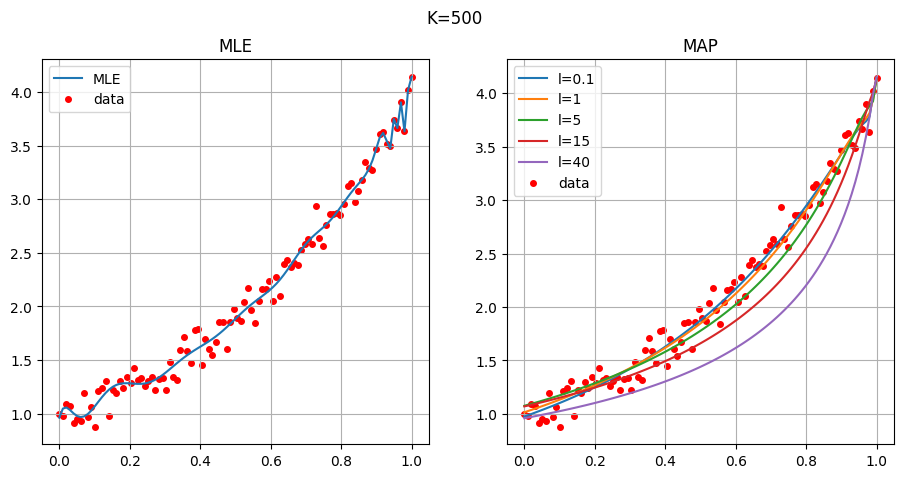

In [11]:
K=500
phi=vandermore(X, K)
theta_MLE=fit_mle((X,Y), K)
mle_error=test_Error(theta_MLE, phi, Y)
print("MLE error: ", mle_error)
fig, axes=plt.subplots(nrows=1,ncols=2, figsize=(11,5), sharex=True, sharey=False)
axes[0].plot(X, phi@theta_MLE, label="MLE", zorder=2)
axes[0].plot(X,Y, "ro", markersize=4, label="data", zorder=1)
axes[0].legend()
axes[0].grid()
print("MAP error: ")
for l in l_val:
    theta_map=fit_map((X,Y), K, l)
    map_error=test_Error(theta_map, phi, Y)
    print("    lambda=", l, "->", map_error)
    axes[1].plot(X, phi@theta_map, label="l="+str(l), zorder=2)
axes[1].plot(X,Y, "ro", markersize=4, label="data", zorder=1)
axes[1].legend()
axes[1].grid()
plt.subplot(1,2,1)
plt.title("MLE")
plt.subplot(1,2,2)
plt.title("MAP")

plt.suptitle("K="+str(K))



Define $Err(\theta)=\frac{||\theta-\theta_{true}||}{||\theta_{true}||}$, then compare Err($\theta_{MLE}$) and Err($\theta_{MAP}$) for different values of K and λ.

In [12]:
def err(theta, theta_true):
    if(theta_true.shape[0]<theta.shape[0]):
        theta_true=np.concatenate((theta_true, np.zeros(theta.shape[0]-theta_true.shape[0])))
    err=np.linalg.norm(theta-theta_true, 2)
    err=err/np.linalg.norm(theta_true, 2)
    return err
K=4
phi=vandermore(X, K)
theta_true_mle=fit_mle((X,Y), K)
theta_true_map=fit_map((X,Y), K, 0)
k_val=[30,50,70]
l_val=[0,1,5,15,40]
for k in k_val:
    theta_mle=fit_mle((X,Y), k)
    print("k=", k)
    print(" MLE error=", err(theta_mle, theta_true_mle))
    print(" MAP error")
    for l in l_val:
        theta_map=fit_map((X,Y), k, l)
        print(" l=",l,"->", err(theta_map, theta_true_map))
    
    print("")

k= 30
 MLE error= 2836054.9065208677
 MAP error
 l= 0 -> 2836054.9065208677
 l= 1 -> 0.3359806090672578
 l= 5 -> 0.4032309608816207
 l= 15 -> 0.4670742239485828
 l= 40 -> 0.5351659387137462

k= 50
 MLE error= 8255314.341641183
 MAP error
 l= 0 -> 8255314.341641183
 l= 1 -> 0.3423182690690047
 l= 5 -> 0.4036938190767643
 l= 15 -> 0.4682910399773893
 l= 40 -> 0.5341979631885303

k= 70
 MLE error= 54593250.08171868
 MAP error
 l= 0 -> 54593250.08171868
 l= 1 -> 0.3446070880443395
 l= 5 -> 0.403969186566896
 l= 15 -> 0.46866387575684115
 l= 40 -> 0.5340702071008931

